In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import random
from scipy.stats import gennorm
from scipy.stats import binom
from scipy.stats import uniform
import sympy as sp
from scipy.integrate import quad

In [ ]:
def crearArchivo(fichero):
  file = open(fichero, 'w', encoding='utf8')
  file.close()

# Resolución de la ecuación de las perturbaciones

Vamos a resolver la ecuación de las perturbaciones, que es la siguiente:

\begin{equation}
  \frac{dx}{dt} = Ax
\end{equation}

Donde el punto fijo es $x = 0$.

## Ecosistema random

In [ ]:
def GenerarM(S, d, C, media, sigma):
  a = media - np.sqrt(3.0)*sigma
  b = media + np.sqrt(3.0)*sigma
  M = a*np.random.rand(S, S) + b*np.random.rand(S, S)
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j]=0.0
      else:
        M[i, j] = d
  
  return M

In [ ]:
S = 250
A = GenerarM(S, -1.0, 0.5, 0, 0.13)
from scipy.integrate import odeint, ode
# Definimos el tiempo:
t = np.linspace(0.0, 100.0, 10000)

# Definimos el vector de condiciones iniciales como otro vector aleatorio con la distribucion uniforme entre 0 y 1
inicial = np.random.rand(S)

def dx(x, t):
    return np.dot(A, x)

x1 = odeint(dx, inicial, t)

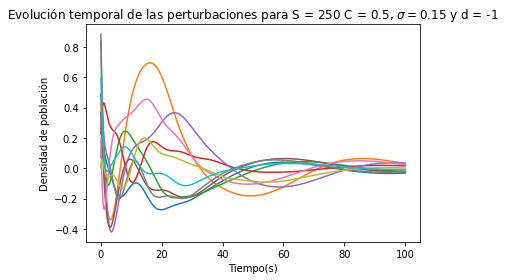

In [ ]:
t = np.linspace(0.0, 100.0, 10000)
#plt.ylim(-0.3, 1.0)
#plt.xlim(0, 10.0)
plt.title('Evolución temporal de las perturbaciones para S = ' + str(S) + ' C = 0.5, $\sigma = 0.15$ y d = -1')
plt.xlabel('Tiempo(s)')
plt.ylabel('Densidad de población')
for i in range(10):
  plt.plot(t, x1[:, i], label= str(i))
#plt.legend(loc = 2) 
plt.savefig('Resolucion_randomC.pdf')

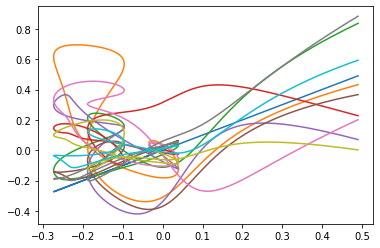

In [ ]:
for i in range(10):
  plt.plot(x1[:, 0], x1[:, i])
plt.savefig('Fases_random_10_prim.pdf')

In [ ]:
# Vamos a ir comparando con los diferentes sigmas de 0.125 a 0.14 con pasos de 0.005
sigma = []
soluciones = []
S = 250 
sig = 0.125
while(sig < 0.141):
  A = GenerarM(S, -1.0, 0.5, 0, sig)
  from scipy.integrate import odeint, ode
  # Definimos el tiempo:
  t = np.linspace(0.0, 30.0, 10000)

  # Definimos el vector de condiciones iniciales como otro vector aleatorio con la distribucion uniforme entre 0 y 1
  inicial = np.random.rand(S)

  def dx(x, t):
      return np.dot(A, x)

  x1 = odeint(dx, inicial, t)
  sigma.extend([sig])
  soluciones.extend([x1[:, 0]])
  sig += 0.005

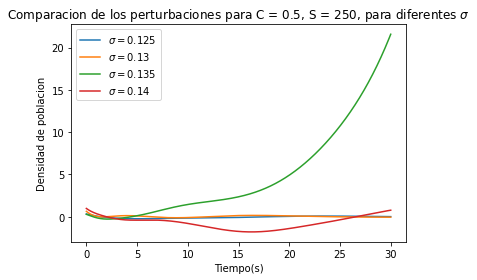

In [ ]:
plt.title('Comparacion de los perturbaciones para C = 0.5, S = 250, para diferentes $\sigma$')
plt.xlabel('Tiempo(s)')
plt.ylabel('Densidad de poblacion')
for i in range(len(soluciones)):
  plt.plot(t, soluciones[i], label = '$\sigma = $' + str(sigma[i]))
plt.legend(loc = 0)
plt.savefig('Comparacion_random.pdf')

# Ecosistema predador-presa

In [ ]:
# Empezamos obteniendo la función que genere redes predador-presa, pero con gaussianas
def GenerarPredadorPresaGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j]*M[j, i] > 0):
            M[i, j] = (-1.0)*M[i, j]
      else:
        M[i, j] = d
  
  return M

In [ ]:
S = 250
A = GenerarPredadorPresaGauss(S, -1.0, 0.5, 0, 0.3398)
from scipy.integrate import odeint, ode
# Definimos el tiempo:
t = np.linspace(0.0, 10.0, 10000)

# Definimos el vector de condiciones iniciales como otro vector aleatorio con la distribucion uniforme entre 0 y 1
inicial = np.random.rand(S)

def dx(x, t):
    return np.dot(A, x)

x2 = odeint(dx, inicial, t)

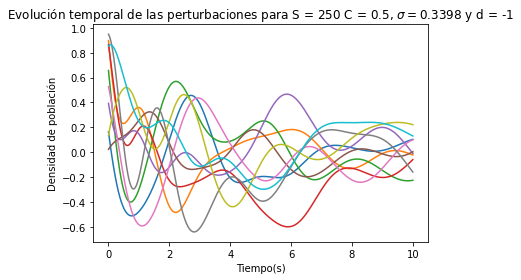

In [ ]:
t = np.linspace(0.0, 10.0, 10000)
#plt.ylim(-0.3, 1.0)
#plt.xlim(0, 10.0)
plt.title('Evolución temporal de las perturbaciones para S = ' + str(S) + ' C = 0.5, $\sigma = 0.3398$ y d = -1')
plt.xlabel('Tiempo(s)')
plt.ylabel('Densidad de población')
for i in range(10):
  plt.plot(t, x2[:, i], label= str(i))
#plt.legend(loc = 1)
plt.savefig('Resolucion_Predador_PresaC.pdf')

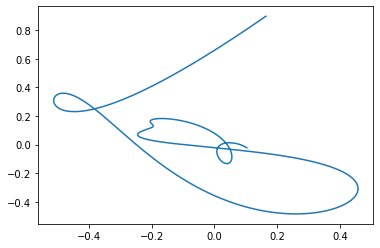

In [ ]:
plt.plot(x2[:, 0], x2[:, 1])
#for i in range(10):
#  plt.plot(x1[:, 5], x1[:, i])
plt.savefig('Fases_PredGauss_10_prim.pdf')

In [ ]:
# Vamos a ir comparando con los diferentes sigmas de 0.125 a 0.14 con pasos de 0.005
sigma = []
soluciones = []
S = 250 
sig = 0.3398
while(sig < 0.4):
  A = GenerarPredadorPresaGauss(S, -1.0, 0.5, 0, sig)
  from scipy.integrate import odeint, ode
  # Definimos el tiempo:
  t = np.linspace(0.0, 100.0, 10000)

  # Definimos el vector de condiciones iniciales como otro vector aleatorio con la distribucion uniforme entre 0 y 1
  inicial = np.random.rand(S)

  def dx(x, t):
      return np.dot(A, x)

  x1 = odeint(dx, inicial, t)
  sigma.extend([sig])
  soluciones.extend([x1[:, 0]])
  sig += 0.02

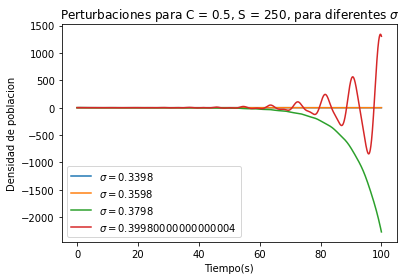

In [ ]:
plt.title('Perturbaciones para C = 0.5, S = 250, para diferentes $\sigma$')
plt.xlabel('Tiempo(s)')
plt.ylabel('Densidad de poblacion')
#t = np.linspace(0.0, 30, 10000)
for i in range(len(soluciones)):
  plt.plot(t, soluciones[i], label = '$\sigma = $' + str(sigma[i]))
plt.legend(loc = 3)
plt.savefig('Comparacion_PredGauss.pdf')

## Ecosistema mixto entre mutualismo y competición (Caso Gaussiano)

In [ ]:
# Antes, definimos a función que genera una red de mutualismo combinada con competición.
def GenerarMixtureGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j]*M[j, i] < 0):
            M[i, j] = (-1.0)*M[i, j]
      else:
        M[i, j] = d
  
  return M

In [ ]:
S = 250
A = GenerarMixtureGauss(S, -1.0, 0.5, 0, 0.0795)
from scipy.integrate import odeint, ode
# Definimos el tiempo:
t = np.linspace(0.0, 100.0, 10000)

# Definimos el vector de condiciones iniciales como otro vector aleatorio con la distribucion uniforme entre 0 y 1
inicial = np.random.rand(S)

def dx(x, t):
    return np.dot(A, x)

x3 = odeint(dx, inicial, t)

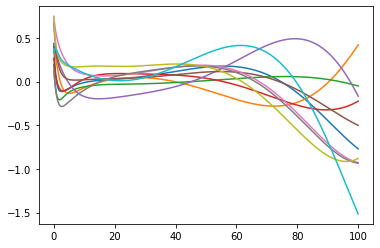

In [ ]:
t = np.linspace(0.0, 100.0, 10000)
#plt.ylim(-0.3, 1.0)
#plt.xlim(0, 10.0)
for i in range(10):
  plt.plot(t, x3[:, i], label= str(i))
#plt.legend(loc = 1)
plt.savefig('Resolucioin_MixGauss.pdf')

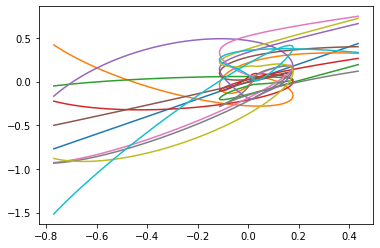

In [ ]:
#plt.plot(x3[:, 0], x3[:, 91])
for i in range(10):
  plt.plot(x3[:, 0], x3[:, i])
plt.savefig('Fases_MixGauss_10_prim.pdf')

In [ ]:
# Vamos a ir comparando con los diferentes sigmas de 0.125 a 0.14 con pasos de 0.005
sigma = []
soluciones = []
S = 250 
sig = 0.072
while(sig < 0.085):
  A = GenerarMixtureGauss(S, -1.0, 0.5, 0.0, sig)
  from scipy.integrate import odeint, ode
  # Definimos el tiempo:
  t = np.linspace(0.0, 100.0, 10000)

  # Definimos el vector de condiciones iniciales como otro vector aleatorio con la distribucion uniforme entre 0 y 1
  inicial = np.random.rand(S)

  def dx(x, t):
      return np.dot(A, x)

  x1 = odeint(dx, inicial, t)
  sigma.extend([sig])
  soluciones.extend([x1[:, 0]])
  sig += 0.002

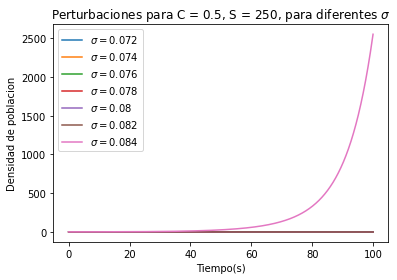

In [ ]:
plt.title('Perturbaciones para C = 0.5, S = 250, para diferentes $\sigma$')
plt.xlabel('Tiempo(s)')
plt.ylabel('Densidad de poblacion')
for i in range(len(soluciones)):
  plt.plot(t, soluciones[i], label = '$\sigma = $' + str(sigma[i]))
plt.legend(loc = 2)
plt.savefig('Comparacion_MixGauss.pdf')

## Ecosistema mixto entre mutualismo y competición(Uniforme)

In [ ]:
def GenerarMixture(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  a = media - np.sqrt(3.0)*sigma
  b = media + np.sqrt(3.0)*sigma
  M = a*np.random.rand(S, S) + b*np.random.rand(S, S)
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j]*M[j, i] < 0):
            M[i, j] = (-1.0)*M[i, j]
      else:
        M[i, j] = d
  
  return M

In [ ]:
S = 250
A = GenerarMixture(S, -1.0, 0.5, 0, 0.0795)
from scipy.integrate import odeint, ode
# Definimos el tiempo:
t = np.linspace(0.0, 100.0, 10000)

# Definimos el vector de condiciones iniciales como otro vector aleatorio con la distribucion uniforme entre 0 y 1
inicial = np.random.rand(S)

def dx(x, t):
    return np.dot(A, x)

x4 = odeint(dx, inicial, t)

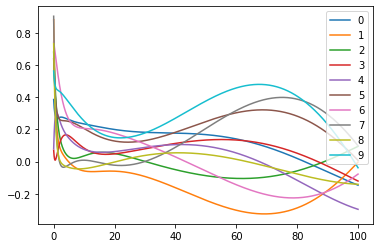

In [ ]:
t = np.linspace(0.0, 100.0, 10000)
#plt.ylim(-0.3, 1.0)
#plt.xlim(0, 10.0)
for i in range(10):
  plt.plot(t, x4[:, i], label= str(i))
plt.legend(loc = 1)

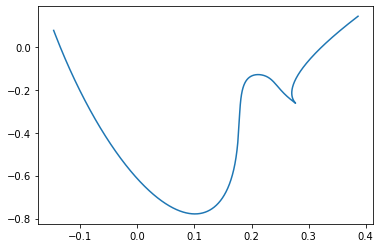

In [ ]:
plt.plot(x4[:, 0], x4[:, 91])

Para este caso no conozco muy bien el punto crítico, así que convendría primero sacarlo y ver que pasa, pero por lo que se ve no merece mucho la pena

## Ecosistema mutualista

In [ ]:
# Antes, definimos a función que genera una red de mutualismo combinada con competición.
def GenerarMutuaGauss(S, d, C, media, sigma):
  # En este caso, la distribucion de probabilidad es la uniforme
  M = np.random.normal(loc = media, scale = sigma, size = (S, S))
  for i in range(S):
    for j in range(S):
      num = np.random.rand()
      if(i != j):
        if(num > C):
         M[i, j] = 0.0
         M[j, i] = 0.0
        else:
          if(M[i, j] < 0):
            M[i, j] = (-1.0)*M[i, j]
          if(M[j, i] < 0):
            M[j, i] = -1.0*M[j, i]
      else:
        M[i, j] = d
  
  return M

In [ ]:
S = 250
A = GenerarMutuaGauss(S, -1.0, 0.5, 0, 0.13)
from scipy.integrate import odeint, ode
# Definimos el tiempo:
t = np.linspace(0.0, 100.0, 10000)

# Definimos el vector de condiciones iniciales como otro vector aleatorio con la distribucion uniforme entre 0 y 1
inicial = np.random.rand(S)

def dx(x, t):
    return np.dot(A, x)

x5 = odeint(dx, inicial, t)

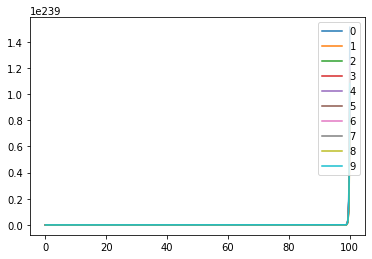

In [ ]:
t = np.linspace(0.0, 100.0, 10000)
#plt.ylim(-0.3, 1.0)
#plt.xlim(0, 10.0)
for i in range(10):
  plt.plot(t, x5[:, i], label= str(i))
plt.legend(loc = 1)